# JM0250 Data Visualization 
### Academic year 2022-2023

## FIFA World Cup 2022 Data Exploration
Data sources:

- FIFA World Cup 2022 Player Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-player-data)
- FIFA World Cup 2022 Match Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-match-data)
- FIFA World Cup 2022 Team Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-statistics)
- FIFA World Cup 2022 Twitter Dataset (https://www.kaggle.com/datasets/kumari2000/fifa-world-cup-twitter-dataset-2022)
- FIFA World Cup 2022 Prediction (https://www.kaggle.com/datasets/shilongzhuang/soccer-world-cup-challenge)
- FIFA World Cup 2022 Player Images (https://www.kaggle.com/datasets/soumendraprasad/fifa-2022-all-players-image-dataset)
- FIFA World Cup Historic (https://www.kaggle.com/datasets/piterfm/fifa-football-world-cup)
- FIFA World Cup Penalty Shootouts (https://www.kaggle.com/datasets/pablollanderos33/world-cup-penalty-shootouts, https://www.kaggle.com/datasets/jandimovski/world-cup-penalty-shootouts-2022)

Data dictionaries and additional info can be found in the respective data folders.

In [2]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Do not truncate tables
pd.set_option('display.max_columns', None)

In [3]:
# Load the data

def data_path(relative):
    data_source_path = "C:/Users/ljpsm/OneDrive/studie/tue/Visualisation/Assignment/FIFA DataSet/"
    return os.path.join(data_source_path, relative)

# Match data
df_match_data = pd.read_csv(data_path('Data/FIFA World Cup 2022 Match Data/data.csv'), delimiter=',')

# Player data
df_player_defense       = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_defense.csv'), delimiter=',')
df_player_gca           = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_gca.csv'), delimiter=',')
df_player_keepers       = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_keepers.csv'), delimiter=',')
df_player_keepersadv    = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_keepersadv.csv'), delimiter=',')
df_player_misc          = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_misc.csv'), delimiter=',')
df_player_passing       = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_passing.csv'), delimiter=',')
df_player_passing_types = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_passing_types.csv'), delimiter=',')
df_player_playingtime   = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_playingtime.csv'), delimiter=',')
df_player_possession    = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_possession.csv'), delimiter=',')
df_player_shooting      = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_shooting.csv'), delimiter=',')
df_player_stats         = pd.read_csv(data_path('Data/FIFA World Cup 2022 Player Data/player_stats.csv'), delimiter=',')

# Team data
df_team_data        = pd.read_csv(data_path('Data/FIFA World Cup 2022 Team Data/team_data.csv'), delimiter=',')
df_team_group_stats = pd.read_csv(data_path('Data/FIFA World Cup 2022 Team Data/group_stats.csv'), delimiter=',')

# Historic data
df_historic_fifa_ranking      = pd.read_csv(data_path('Data/FIFA World Cup Historic/fifa_ranking_2022-10-06.csv'), delimiter=',')
df_historic_matches_1930_2022 = pd.read_csv(data_path('Data/FIFA World Cup Historic/matches_1930_2022.csv'), delimiter=',')
df_historic_world_cup         = pd.read_csv(data_path('Data/FIFA World Cup Historic/world_cup.csv'), delimiter=',')

# Penalty shootouts
df_penalty_shootouts = pd.read_csv(data_path('Data/FIFA World Cup Penalty Shootouts/WorldCupShootouts.csv'), delimiter=',')

# Twitter data
df_tweets_01 = pd.read_csv(data_path('Data/FIFA World Cup 2022 Twitter Dataset/tweets1.csv'), delimiter=';')
df_tweets_02 = pd.read_csv(data_path('Data/FIFA World Cup 2022 Twitter Dataset/tweets2.csv'), delimiter=';')
df_tweets = pd.concat([df_tweets_01, df_tweets_02])

# Prediction data
df_prediction_groups  = pd.read_csv(data_path('Data/FIFA World Cup 2022 Prediction/2022_world_cup_groups.csv'), delimiter=',')
df_prediction_matches = pd.read_csv(data_path('Data/FIFA World Cup 2022 Prediction/2022_world_cup_matches.csv'), delimiter=',')
df_prediction_international_matches = pd.read_csv(data_path('Data/FIFA World Cup 2022 Prediction/international_matches.csv'), delimiter=',')
df_prediction_world_cup_matches = pd.read_csv(data_path('Data/FIFA World Cup 2022 Prediction/world_cup_matches.csv'), delimiter=',')
df_prediction_world_cups = pd.read_csv(data_path('Data/FIFA World Cup 2022 Prediction/world_cups.csv'), delimiter=',')

# Player images
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

def showImages(group, land, player):
    images  = list_full_paths(data_path('Data/FIFA World Cup 2022 Player Images/Images/Images/Group ') + group + '/' + land + ' Players/Images_' + player)
    img_arr = []
    
    for image in images:
        img_arr.append(img_reshape(image))
        
    rows = 5
    cols = 5
    img_count = 0
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=((5,5)))
                             
    for i in range(rows):
        for j in range(cols):
            if img_count < len(img_arr):
                axes[i,j].imshow(img_arr[img_count])
                axes[i,j].axis('off')
                img_count+=1
                
    plt.subplots_adjust(wspace=0, hspace=0)
    

In [4]:
## Explore Match data
df_match_data.head(5)

,match,dayofweek,match_time,home_team,away_team,home_xg,away_xg,score,attendance,venue,referee,home_formation,away_formation,home_captain,away_captain,home_manager,away_manager,home_possession,away_possession,home_completed_passes,home_attempted_pases,away_completed_passes,away_attempted_pases,home_sot,away_sot,home_total_shots,away_total_shots,home_saves,away_saves,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,home_touches,away_touches,home_tackles,away_tackles,home_interceptions,away_interceptions,home_aerials_won,away_aerials_won,home_clearances,away_clearances,home_offsides,away_offsides,home_gks,away_gks,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls
0,1,Sun,2022-11-20 19:00:00,Qatar,Ecuador,0.3,1.2,0–2,67372,Al Bayt Stadium,Daniele Orsato,5-3-2,4-4-2,Hassan Al-Haydos,Enner Valencia,Félix Sánchez,Gustavo Alfaro,47,53,377,469,430,522,0,2,5,5,1,0,15,15,1,3,8,14,549,601,10,14,2,12,14,13,18,7,3,4,4,7,20,17,51,70
1,2,Mon,2022-11-21 16:00:00,England,IR Iran,2.1,1.4,6–2,45334,Khalifa International Stadium,Raphael Claus,4-2-3-1,5-4-1,Harry Kane,Ehsan Hajsafi,Gareth Southgate,Carlos Queiroz,77,23,740,838,162,248,7,2,13,7,1,1,9,14,8,0,21,8,922,341,13,12,7,16,10,10,4,23,2,2,5,5,18,17,87,50
2,3,Mon,2022-11-21 19:00:00,Senegal,Netherlands,0.9,0.7,0–2,41721,Al Thumama Stadium,Wilton Sampaio,4-2-3-1,3-4-1-2,Kalidou Koulibaly,Virgil van Dijk,Aliou Cissé,Louis van Gaal,46,54,333,427,387,494,4,3,15,10,1,4,13,13,6,7,19,25,531,573,14,10,10,6,22,20,32,16,2,1,6,10,17,28,64,66
3,4,Mon,2022-11-21 22:00:00,United States,Wales,0.8,1.5,1–1,43418,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,4-3-3,3-5-2,Tyler Adams,Gareth Bale,Gregg Berhalter,Rob Page,58,42,524,624,335,446,1,2,6,6,2,0,15,10,5,3,30,14,724,568,14,18,6,8,14,12,18,31,1,1,5,10,22,25,56,90
4,5,Tue,2022-11-22 13:00:00,Argentina,Saudi Arabia,2.2,0.1,1–2,88012,Lusail Iconic Stadium,Slavko Vinčič,4-4-2,4-1-4-1,Lionel Messi,Salman Al-Faraj,Lionel Scaloni,Hervé Renard,69,31,546,659,195,294,5,2,14,3,0,5,7,21,9,2,23,10,753,411,17,18,9,14,16,7,11,26,10,1,3,9,24,13,55,59


In [5]:
df_match_data.describe()

,match,home_xg,away_xg,attendance,home_possession,away_possession,home_completed_passes,home_attempted_pases,away_completed_passes,away_attempted_pases,home_sot,away_sot,home_total_shots,away_total_shots,home_saves,away_saves,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,home_touches,away_touches,home_tackles,away_tackles,home_interceptions,away_interceptions,home_aerials_won,away_aerials_won,home_clearances,away_clearances,home_offsides,away_offsides,home_gks,away_gks,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,1.379687,1.270312,53191.437500,50.890625,49.109375,444.843750,545.765625,427.515625,529.265625,4.062500,3.437500,11.125000,11.265625,2.468750,2.640625,12.625000,12.343750,4.484375,4.437500,16.640625,17.375000,651.109375,633.062500,16.484375,15.843750,8.421875,8.296875,13.937500,13.093750,19.312500,18.203125,1.984375,1.984375,7.625000,7.500000,20.921875,19.765625,65.906250,65.125000
std,18.618987,0.889655,0.953636,17108.666048,12.744270,12.744270,156.147084,156.710403,165.301071,169.349572,2.455153,2.617857,4.952152,5.853346,2.189214,1.938476,5.244801,3.788951,2.777416,2.782456,8.241142,6.936217,151.298099,165.782117,4.649602,5.909956,3.517777,3.274140,5.258025,5.019703,9.098884,9.123804,1.741120,1.713552,3.359422,2.678545,6.347865,5.479376,14.937668,14.217695
min,1.000000,0.100000,0.000000,39089.000000,18.000000,19.000000,165.000000,245.000000,162.000000,248.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,0.000000,2.000000,4.000000,356.000000,341.000000,8.000000,5.000000,2.000000,3.000000,6.000000,5.000000,4.000000,3.000000,0.000000,0.000000,0.000000,2.000000,9.000000,8.000000,41.000000,39.000000
25%,16.750000,0.700000,0.600000,42424.000000,41.750000,40.750000,332.750000,424.500000,322.500000,417.500000,2.750000,2.000000,8.000000,7.000000,1.000000,1.000000,9.000000,10.000000,2.000000,2.000000,11.000000,13.000000,526.750000,530.000000,13.000000,12.000000,7.000000,5.000000,10.000000,10.000000,12.750000,12.000000,1.000000,1.000000,5.750000,5.000000,16.000000,15.000000,55.000000,55.750000
50%,32.500000,1.250000,1.100000,44093.000000,53.000000,47.000000,446.500000,552.500000,396.500000,494.000000,4.000000,3.000000,10.000000,10.500000,2.000000,2.000000,13.000000,12.000000,4.500000,4.000000,16.500000,16.000000,652.500000,604.000000,16.000000,14.500000,8.000000,8.000000,13.500000,12.000000,19.000000,17.000000,2.000000,2.000000,7.000000,8.000000,21.000000,20.000000,64.000000,64.000000
75%,48.250000,1.825000,1.700000,66851.500000,59.250000,58.250000,532.250000,630.750000,509.500000,612.500000,6.000000,5.000000,14.000000,13.000000,3.250000,4.000000,15.000000,14.250000,6.000000,6.000000,22.000000,21.250000,735.750000,702.750000,20.250000,19.000000,10.000000,11.000000,18.000000,15.000000,24.000000,22.250000,3.000000,3.000000,9.000000,10.000000,24.000000,23.250000,74.750000,75.000000
max,64.000000,4.000000,5.700000,88966.000000,81.000000,82.000000,1009.000000,1093.000000,995.000000,1106.000000,10.000000,11.000000,25.000000,32.000000,10.000000,8.000000,30.000000,24.000000,12.000000,14.000000,46.000000,35.000000,1179.000000,1190.000000,28.000000,37.000000,19.000000,16.000000,26.000000,33.000000,45.000000,50.000000,10.000000,7.000000,18.000000,13.000000,40.000000,33.000000,99.000000,106.000000


In [13]:
# Remove penalty data from score
df_match_data['score'] = df_match_data['score'].str.replace(r"\(.\)","")

def extract_penalty(score: str, home: bool):
    import re

    if home:
        match = re.match(r'\d+', score)
        if match:
            return match.group()
        else:
            return None
    else:
        match = re.match(r'(\d+)\((\d+)\)', score)
        if match:
            return match.group(2)
        else:
            return None

def extract_score(score: str, home: bool):
    import re

    if home:
        match = re.match(r'\((\d+)\)(\d+)', score)
        if match:
            return match.group(2)
        else:
            return score
    else:
        match = re.match(r'\d+', score)
        if match:
            return match.group()
        else:
            print("Away: ", score)
            return None
           
# Split match score               
df_match_data[['score_home', 'score_away']] = df_match_data.score.str.split("–", expand=True,)
df_match_data['penalty_home'] = df_match_data['score_home'].str.replace(" ","")
df_match_data['penalty_away'] = df_match_data['score_away'].str.replace(" ","")
df_match_data['penalty_home'] = df_match_data['penalty_home'].apply(lambda x: extract_penalty(x, True))
df_match_data['penalty_away'] = df_match_data['penalty_away'].apply(lambda x: extract_penalty(x, False))
df_match_data['score_home'] = df_match_data['score_home'].str.replace(" ","").apply(lambda x: extract_score(x, True)).astype('int')
df_match_data['score_away'] = df_match_data['score_away'].str.replace(" ","").apply(lambda x: extract_score(x, False)).astype('int')

fig = px.scatter(df_match_data, x="home_possession", y="score_home",
                 color="venue", size="attendance",
                 width=1000, height=800)
fig.show()

Home:  0
Home:  6
Home:  0
Home:  1
Home:  1
Home:  0
Home:  0
Home:  4
Home:  0
Home:  1
Home:  7
Home:  1
Home:  1
Home:  0
Home:  3
Home:  2
Home:  0
Home:  1
Home:  1
Home:  0
Home:  0
Home:  2
Home:  2
Home:  2
Home:  0
Home:  0
Home:  4
Home:  1
Home:  3
Home:  2
Home:  1
Home:  2
Home:  1
Home:  2
Home:  0
Home:  0
Home:  1
Home:  1
Home:  1
Home:  0
Home:  1
Home:  0
Home:  2
Home:  2
Home:  0
Home:  2
Home:  2
Home:  1
Home:  3
Home:  2
Home:  3
Home:  3
Home:  4
Home:  6
Home:  1
Home:  1
Home:  3
Home:  2
Home:  2


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

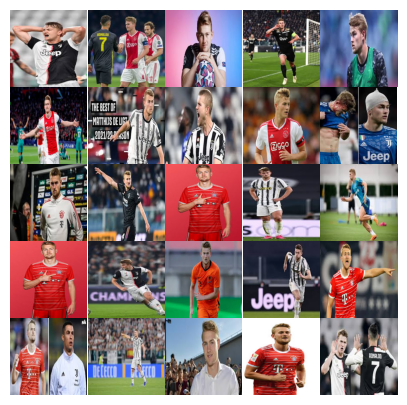

In [7]:
showImages('A', 'Netherlands', 'Matthijs de Ligt')

In [8]:
df_team_data

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90,gk_games,gk_games_starts,gk_minutes,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,gk_saves,gk_save_pct,gk_wins,gk_ties,gk_losses,gk_clean_sheets,gk_clean_sheets_pct,gk_pens_att,gk_pens_allowed,gk_pens_saved,gk_pens_missed,gk_pens_save_pct,gk_free_kick_goals_against,gk_corner_kick_goals_against,gk_own_goals_against,gk_psxg,gk_psnpxg_per_shot_on_target_against,gk_psxg_net,gk_psxg_net_per90,gk_passes_completed_launched,gk_passes_launched,gk_passes_pct_launched,gk_passes,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions,shots,shots_on_target,shots_on_target_pct,shots_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,average_shot_distance,shots_free_kicks,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,pass_xa,xg_assist_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_switches,crosses,throw_ins,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_offsides,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_defense,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_defense,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,blocks,blocked_shots,blocked_passes,interceptions,tackles_interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,miscontrols,dispossessed,passes_received,progressive_passes_received,minutes_per_game,minutes_pct,minutes_per_start,games_complete,games_subs,minutes_per_sub,unused_subs,points_per_game,on_goals_for,on_goals_against,plus_minus,plus_minus_per90,on_xg_for,on_xg_against,xg_plus_minus,xg_plus_minus_per90,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,11,4,5,17,0,1.96,1.04,3.00,1.43,2.48,15.2,11.4,7.8,19.3,1.98,1.02,3.00,1.49,2.51,7,7,690,8,1.04,13,6,53.8,4,2,1,3,42.9,2,2,0,0,0.0,0,0,1,5.4,0.26,-1.6,-0.21,15,78,19.2,147,34,38.8,34.4,39,53.8,46.0,87,12,13.8,4,0.52,12.1,95,41,43.2,12.39,5.35,0.12,0.27,18.3,3,0.12,-0.2,-0.4,3911,4625,84.6,60635,18633,2131,2336,91.2,1453,1636,88.8,233,431,54.1,7.1,0.2,76,242,64,7,217,4237,365,119,10,21,94,151,39,11,17,0,23,62,179,23.35,134,13,6,9,10,7,25,3.26,16,1,3,1,4,0,123,69,70,41,12,59,100,59.0,41,84,14,70,52,175,124,0,5388,352,1424,2716,1293,157,5383,45,112,40.2,99,81,3868,210,99,100,87,41,36,24,66,2.00,15,8,7,0.91,15.2,4.6,10.6,1.38,0,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,3,0,0,7,0,0.75,0.75,1.50,0.75,1.50,2.3,2.3,1.9,4.2,0.58,0.48,1.06,0.58,1.06,4,4,360,6,1.50,18,12,66.7,2,0,2,2,50.0,0,0,0,0,-1.0,0,1,0,5.5,0.31,-0.5,-0.13,38,85,44.7,127,13,50.4,38.5,37,56.8,46.2,63,3,4.8,6,1.50,15.5,26,8,30.8,6.50,2.00,0.12,0.38,18.5,0,0.09,0.7,0.7,1254,1696,73.9,22489,8922,546,643,84.9,499,612,81.5,145,306,47.4,1.1,1.1,17,77,15,2,68,1493,202,48,1,13,54,98,8,3,5,0,1,41,